In [1]:
from rational.utils.convert_network import convert_mxnet_model_to_rational
from rational.utils.examples.mxnet import prepare_data_mxnet, train_model_mxnet

import mxnet
from mxnet import gpu
from mxnet.gluon.nn import Flatten, Dense
from mxnet.gluon.model_zoo import vision

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')

In [2]:
seed = 4242
mxnet.random.seed(seed)
np.random.seed(seed)

In [3]:
device = gpu(3)
epochs = 50

train_data, test_data = prepare_data_mxnet(batch_size=256)

In [4]:
vgg = vision.vgg11(pretrained=False)

# modify for mnist
vgg.features = vgg.features[:21]
vgg = vgg.features
vgg.add(Flatten())
vgg.add(Dense(10))

In [5]:
rational_model = convert_mxnet_model_to_rational(vgg, rational_device=device)
rational_model.initialize(ctx=device)
vgg.initialize(ctx=device)

In [6]:
relu_history = train_model_mxnet(vgg, train_data, test_data, device=device, epochs=epochs)

[Epoch   1] train_acc: 65.73% - train_loss:  1.136
[Epoch   1] val_acc: 90.05% - val_loss:  0.288
Model runtime: 27.392s
[Epoch   2] train_acc: 92.50% - train_loss:  0.235
[Epoch   2] val_acc: 89.32% - val_loss:  0.292
Model runtime: 51.531s
[Epoch   3] train_acc: 95.32% - train_loss:  0.150
[Epoch   3] val_acc: 96.42% - val_loss:  0.111
Model runtime: 75.680s
[Epoch   4] train_acc: 96.41% - train_loss:  0.114
[Epoch   4] val_acc: 97.63% - val_loss:  0.070
Model runtime: 100.138s
[Epoch   5] train_acc: 96.99% - train_loss:  0.095
[Epoch   5] val_acc: 97.37% - val_loss:  0.080
Model runtime: 124.526s
[Epoch   6] train_acc: 97.44% - train_loss:  0.082
[Epoch   6] val_acc: 98.05% - val_loss:  0.059
Model runtime: 149.280s
[Epoch   7] train_acc: 97.71% - train_loss:  0.071
[Epoch   7] val_acc: 98.40% - val_loss:  0.045
Model runtime: 173.664s
[Epoch   8] train_acc: 97.89% - train_loss:  0.066
[Epoch   8] val_acc: 97.92% - val_loss:  0.062
Model runtime: 198.349s
[Epoch   9] train_acc: 98.0

In [7]:
rational_history = train_model_mxnet(rational_model, train_data, test_data, device=device, epochs=epochs)

[Epoch   1] train_acc: 68.91% - train_loss:  0.960
[Epoch   1] val_acc: 91.07% - val_loss:  0.260
Model runtime: 37.901s
[Epoch   2] train_acc: 95.62% - train_loss:  0.143
[Epoch   2] val_acc: 95.41% - val_loss:  0.137
Model runtime: 75.842s
[Epoch   3] train_acc: 97.06% - train_loss:  0.092
[Epoch   3] val_acc: 98.42% - val_loss:  0.045
Model runtime: 113.806s
[Epoch   4] train_acc: 97.79% - train_loss:  0.070
[Epoch   4] val_acc: 98.27% - val_loss:  0.054
Model runtime: 151.708s
[Epoch   5] train_acc: 98.11% - train_loss:  0.059
[Epoch   5] val_acc: 98.66% - val_loss:  0.036
Model runtime: 189.719s
[Epoch   6] train_acc: 98.44% - train_loss:  0.049
[Epoch   6] val_acc: 98.13% - val_loss:  0.058
Model runtime: 227.625s
[Epoch   7] train_acc: 98.66% - train_loss:  0.044
[Epoch   7] val_acc: 98.58% - val_loss:  0.041
Model runtime: 265.424s
[Epoch   8] train_acc: 98.84% - train_loss:  0.037
[Epoch   8] val_acc: 98.89% - val_loss:  0.035
Model runtime: 303.402s
[Epoch   9] train_acc: 98.

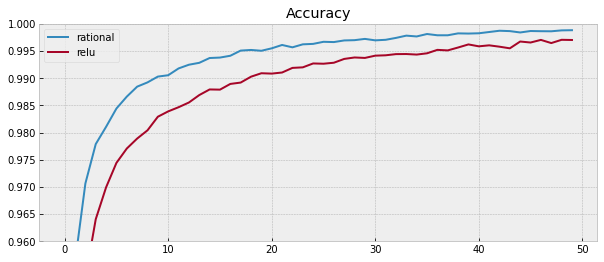

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['accuracy'], label='rational')
plt.plot(range(epochs), relu_history['accuracy'], label='relu')
plt.title('Accuracy')
plt.ylim((0.96, 1))
plt.legend()
plt.show()

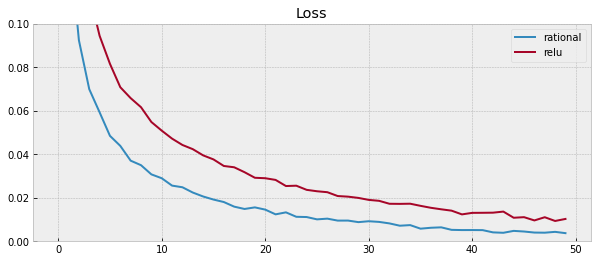

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['loss'], label='rational')
plt.plot(range(epochs), relu_history['loss'], label='relu')
plt.title('Loss')
plt.ylim((0, 0.1))
plt.legend()
plt.show()

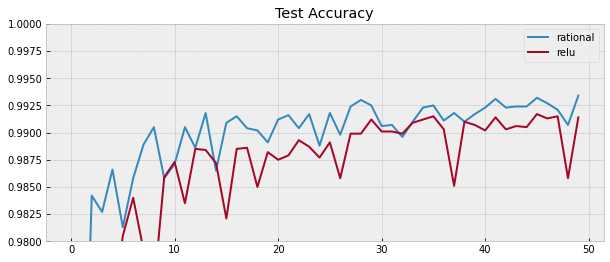

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['val_accuracy'], label='rational')
plt.plot(range(epochs), relu_history['val_accuracy'], label='relu')
plt.title('Test Accuracy')
plt.ylim((0.98, 1))
plt.legend()
plt.show()

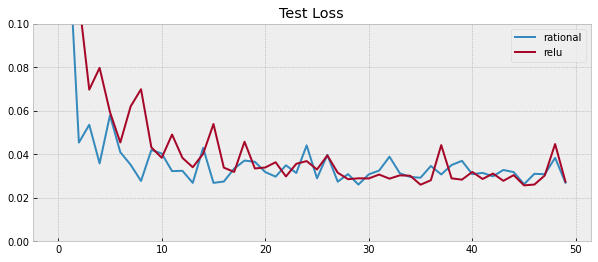

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['val_loss'], label='rational')
plt.plot(range(epochs), relu_history['val_loss'], label='relu')
plt.title('Test Loss')
plt.ylim((0, 0.1))
plt.legend()
plt.show()